### Ranging Testing - 2464 Coffee Can Radar

#### Setup Details:
* Using first chicken noodle soup cantennas
* 20 ms up ramp time
* 2v to 11V triangle waveform
* Using an AD2 to record data from the output of the LPF, using "export" button to export data from a single scope capture to a .csv.

#### 1ft Away from metal sheet

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import os
# Importing data


In [9]:
pd_data_1ft = pd.read_csv('1ft.csv')
time_data = pd_data_1ft['Time (s)']
# find avg diff between consecutive rows
time_data_diff = time_data.diff().mean()
time_data_diff

2.4999999999999875e-06

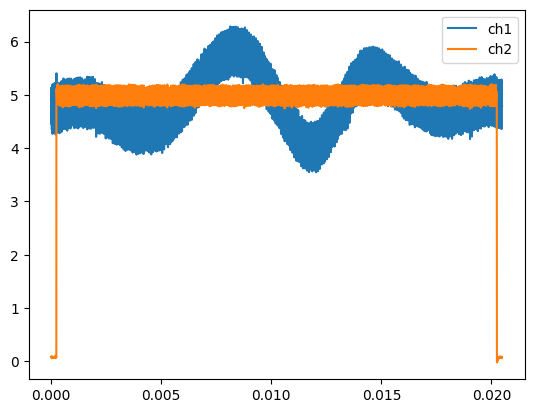

In [27]:
pd_data_1ft = pd.read_csv("../Data Capture/13_Feb_Captures/50_cm.csv", on_bad_lines='skip')
ch1_data  = pd_data_1ft["Channel 1 (V)"].to_numpy()
ch2_data  = pd_data_1ft["Channel 2 (V)"].to_numpy()
time_data = np.linspace(0, len(ch1_data)*time_data_diff, len(ch1_data))

plt.plot(time_data, ch1_data)
plt.plot(time_data, ch2_data)
plt.legend(["ch1", "ch2"])

Text(0.5, 1.0, 'FFT of Ch1 Data')

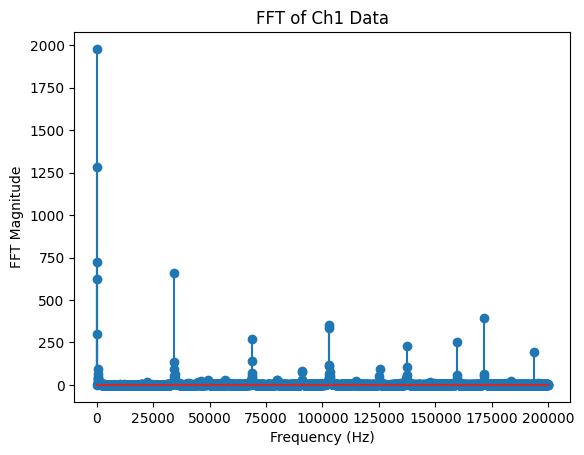

In [ ]:
# Compute FFT

ch1_data_dc_block = ch1_data - np.mean(ch1_data)
ch1_fft = fft(ch1_data_dc_block)

N = ch1_fft.size # Number of samples
dt = time_data[1]-time_data[0] # Time step between samples

xf = fftfreq(N, dt)[:N//2]
yf = abs(ch1_fft)[:N//2]

ylim_Hz = 1000

plt.stem(xf[abs(xf) < ylim_Hz], yf[abs(xf) < ylim_Hz])
plt.xlabel("Frequency (Hz)")
plt.ylabel("FFT Magnitude")
plt.title("FFT of Ch1 Data")

In [1]:
def to_distance(yf):
    c = 3e8   # speed of light (m/s)
    T = 0.02  # chirp duration (s)
    B = 250e6 # chirp bandwidth (Hz)
    return yf*T*c/(2*B)

In [3]:
to_distance(350)

4.2

Text(0.5, 1.0, 'Strength of signal corresponding to distance x')

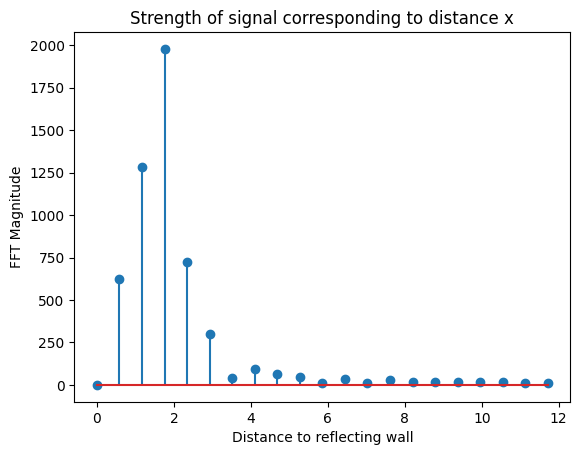

In [24]:
# Range strength plot

distance = to_distance(xf)

plt.stem(distance[abs(xf) < ylim_Hz], yf[abs(xf) < ylim_Hz])
plt.xlabel("Distance to reflecting wall")
plt.ylabel("FFT Magnitude")
plt.title("Strength of signal corresponding to distance x")

8192
8192
8192
8192
8192
8192
8192


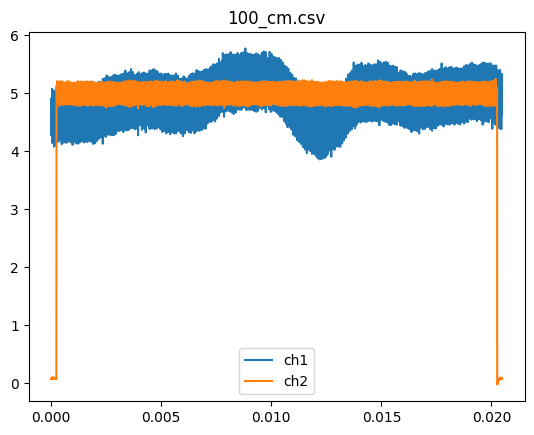

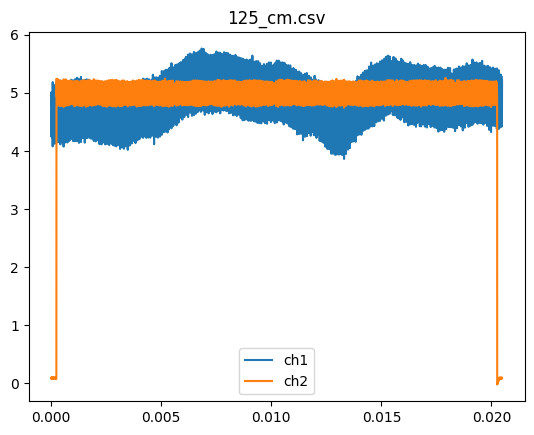

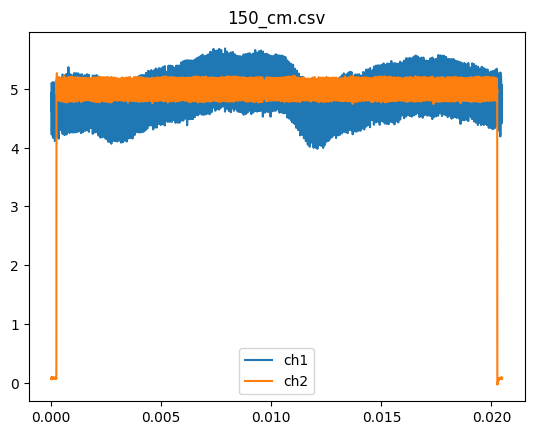

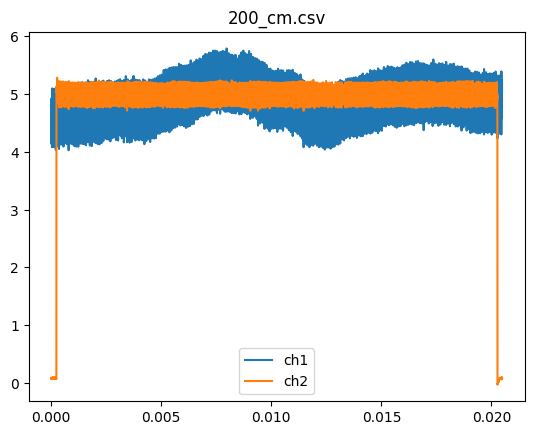

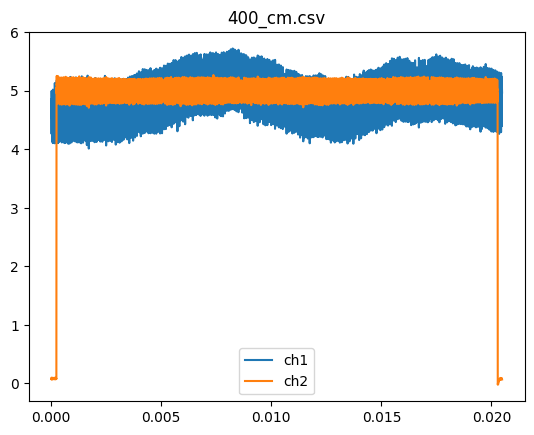

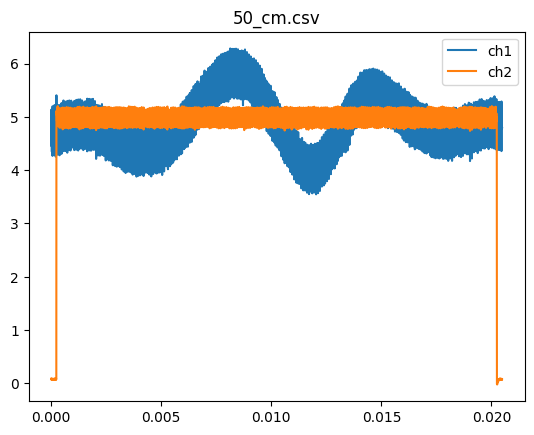

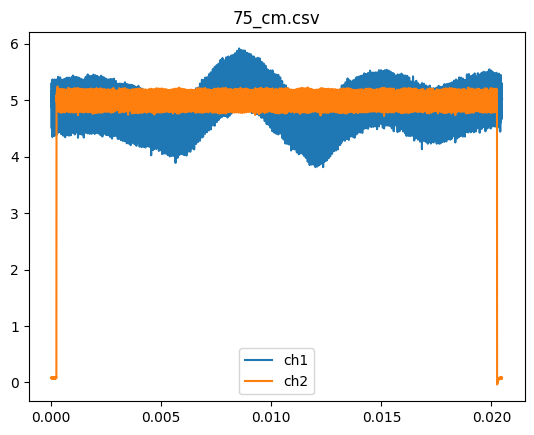

In [30]:
for file in os.listdir("../Data Capture/13_Feb_Captures"):
    pd_data_1ft = pd.read_csv("../Data Capture/13_Feb_Captures/"+file, on_bad_lines='skip')
    ch1_data  = pd_data_1ft["Channel 1 (V)"].to_numpy()
    ch2_data  = pd_data_1ft["Channel 2 (V)"].to_numpy()
    print(len(ch1_data))
    time_data = np.linspace(0, len(ch1_data)*time_data_diff, len(ch1_data))
    plt.figure()
    plt.plot(time_data, ch1_data)
    plt.plot(time_data, ch2_data)
    plt.legend(["ch1", "ch2"])
    plt.title(file)

Peak at distance 1.91976562500001 Hz for file 100_cm.csv
Peak at distance 1.91976562500001 Hz for file 125_cm.csv
Peak at distance 1.91976562500001 Hz for file 150_cm.csv
Peak at distance 1.91976562500001 Hz for file 200_cm.csv
Peak at distance 1.91976562500001 Hz for file 400_cm.csv
Peak at distance 1.91976562500001 Hz for file 50_cm.csv
Peak at distance 1.91976562500001 Hz for file 75_cm.csv


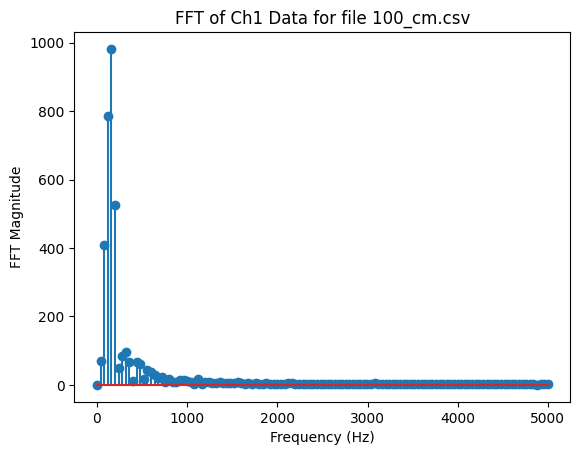

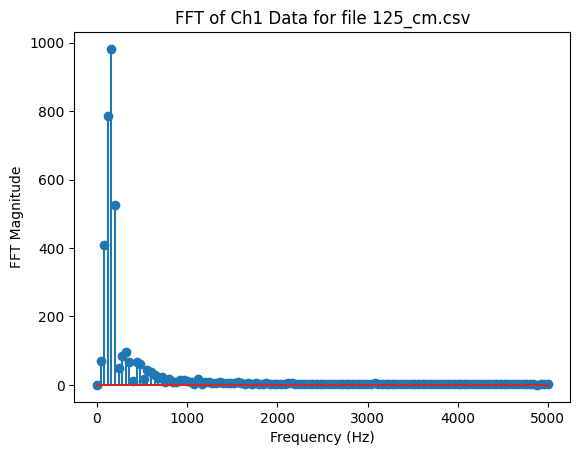

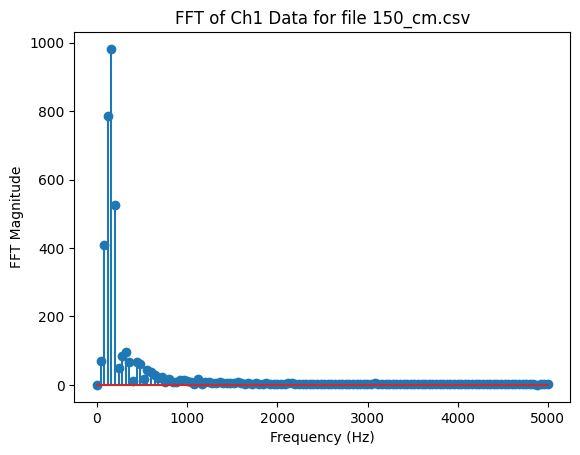

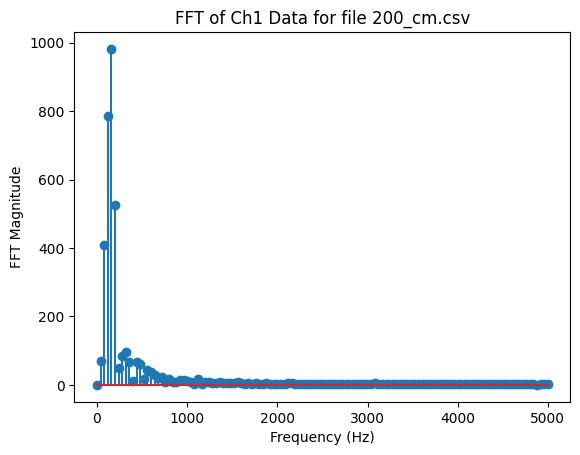

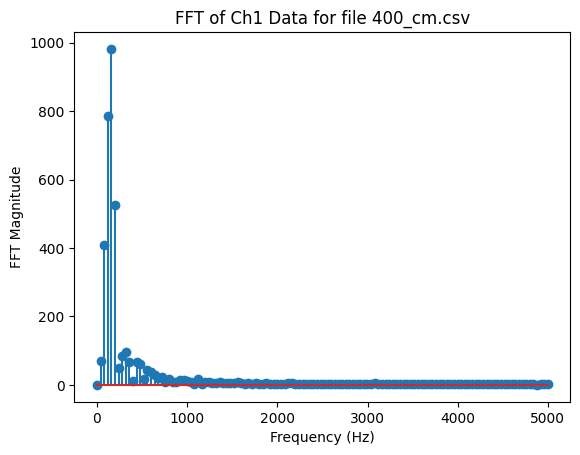

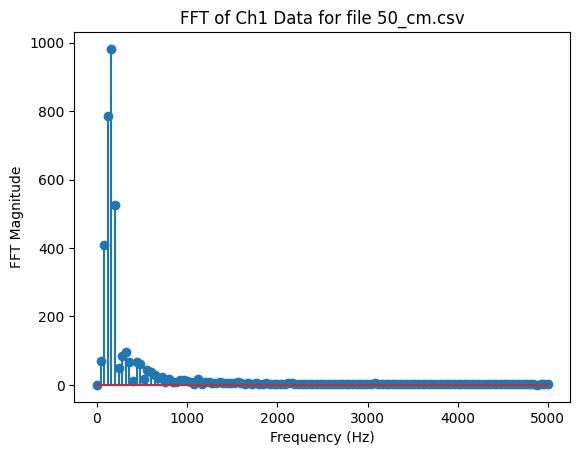

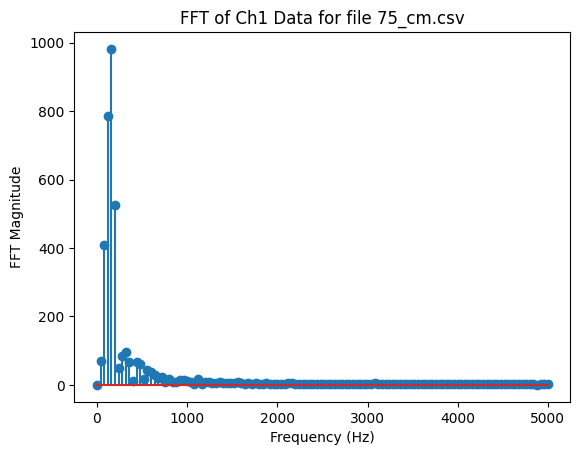

In [32]:
# for each csv in this folder
os.listdir("../Data Capture/13_Feb_Captures")
ylim_Hz = 5000
i = 0
for file in os.listdir("../Data Capture/13_Feb_Captures"):
    i = i + 1
    pd.read_csv("../Data Capture/13_Feb_Captures/"+file, on_bad_lines='skip')
    ch1_data  = pd_data_1ft["Channel 1 (V)"].to_numpy()
    ch1_data_dc_block = ch1_data - np.mean(ch1_data)
    # z pad the data
    ch1_data_dc_block = np.pad(ch1_data_dc_block, (0, 10000-len(ch1_data_dc_block)), 'constant')
    ch1_fft = fft(ch1_data_dc_block)
    
    N = ch1_fft.size # Number of samples
    dt = time_data[1]-time_data[0] # Time step between samples

    xf = fftfreq(N, dt)[:N//2]
    yf = abs(ch1_fft)[:N//2]
    # get peak of fft below 1000 Hz
    
    peak = np.argmax(yf[abs(xf) < ylim_Hz])
    # plot the fft
    plt.figure()
    plt.stem(xf[abs(xf)<ylim_Hz], yf[abs(xf)<ylim_Hz])
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("FFT Magnitude")
    plt.title(f'FFT of Ch1 Data for file {file}')

    print(f'Peak at distance {to_distance(xf[peak])} Hz for file {file}') 
    # if i > 1:
    #     break
    

